# Customer Churn Prediction Using Machine Learning

In this project I'll be trying to predict whether a customer will use the companies services or not based the data.

## Problem Definition

> This project aims to address the issue of customer dissatisfaction by analyzing customer feedback and identifying areas for service improvement. By understanding the gaps between customer expectations and the actual service experience, companies can make informed decisions to enhance their offerings and ensure a higher level of customer satisfaction.


## Data

> The data which is used to build this machine learning model is `Telco Customer Churn` which is available on Kaggle.

## Evaluation

> I'll  try to use different models and evaluation metrics to evaluate all the models.

## Features

These are the features provided by the dataset:

* customerID	
* gender	
* SeniorCitizen	
* Partner	
* Dependents	
* tenure	
* PhoneService	
* MultipleLines	
* InternetService	
* OnlineSecurity	
* OnlineBackup	
* DeviceProtection	
* TechSupport	
* StreamingTV	
* StreamingMovies	
* Contract	
* PaperlessBilling	
* PaymentMethod	
* MonthlyCharges	
* TotalCharges	
* Churn


### Models to Try:

1. Logistic Regression
2. GaussianNB 
3. SVC (Support Vector Classification)
4. Decision Tree Classification
5. Random Forest Classification(Ensemble Learning III)

In [1]:
# Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing etc...
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
data = pd.read_csv("churn-dataset.csv")
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
data.shape

(7043, 21)

In [7]:
# We'll check if there are any expired tenure
df[df["tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# Its better to drop customer data with no tenure
df.drop(labels=df[df["tenure"] == 0].index, axis=0, inplace=True)

In [9]:
df[df["tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
df.shape

(7032, 21)

In [11]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [12]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0:"No", 1:"Yes"})
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [13]:
# We dont need customerID because its not going to help our model to learning anything
df.drop(labels="customerID", axis=1, inplace=True)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


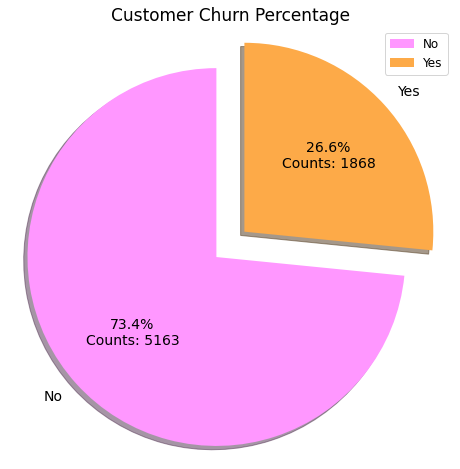

In [35]:
# Plotting a pie for churn customer
labels = ["No", "Yes"]
values = df["Churn"].value_counts()
explode = (0.1, 0.1)

colors = ("#FF97FF", "#fdaa48")

def churn_counts(pct, value):
    total = sum(value)
    count = int(pct / 100.0 *total)
    return f'{pct:.1f}%\nCounts: {count}'

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(values,
                                autopct=lambda pct: churn_counts(pct, values),
                                explode=explode,
                                labels=labels,
                                shadow=True,
                                colors=colors,
                                startangle=90,
                                counterclock=True,
                                textprops={'fontsize': 14})

ax.axis("equal")
ax.legend(fontsize=12)
ax.set_title("Customer Churn Percentage", fontsize=17);

In [118]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [119]:
churn_total = df.Churn.value_counts()
churn_total

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [120]:
gender_No = df.Churn[df.Churn == "No"].groupby(by=df.gender).count()
gender_No

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [121]:
gender_Yes = df.Churn[df.Churn == "Yes"].groupby(by=df.gender).count()
gender_Yes

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [122]:
# Creating a dataframe for gender Yes and No with total
churn_df = {"Female No": 2544,
           "Female Yes": 939,
           "Male No": 2619,
           "Male Yes": 930}

In [123]:
churn_df["Male No"]

2619

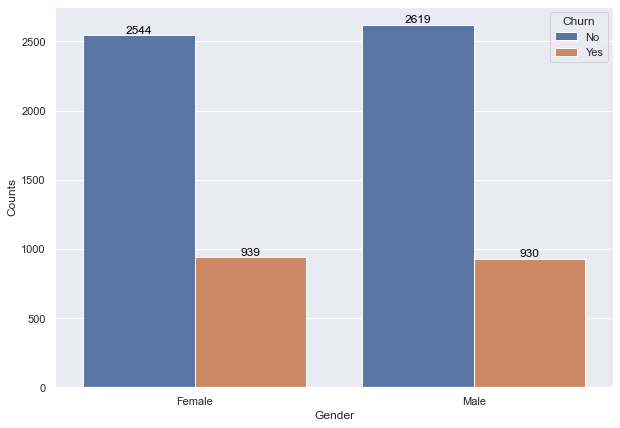

In [124]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 7))
# plt.gca().set_facecolor('#333333')

ax = sns.countplot(data=df, x="gender", hue="Churn")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() /2, p.get_height()), ha="center", va="bottom", color="black",
               fontsize=12)


plt.xlabel("Gender")
plt.ylabel("Counts")
plt.legend(title="Churn")
plt.show()


In [125]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [126]:
df.SeniorCitizen[df.Churn == "No"].value_counts()

SeniorCitizen
No     4497
Yes     666
Name: count, dtype: int64

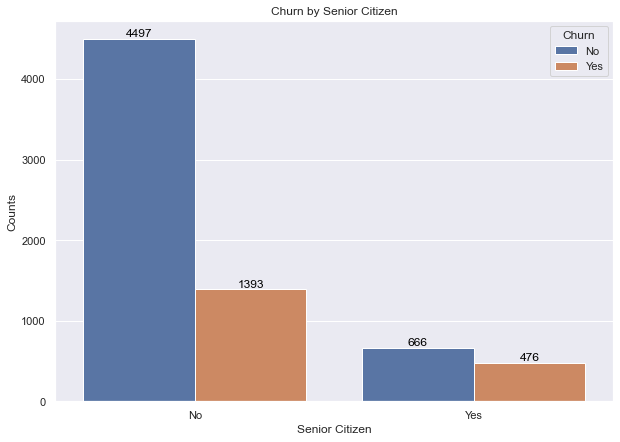

In [127]:
# Plot for Senior Citizen based on churn

# Create a countplot using Seaborn

plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df, x="SeniorCitizen", hue="Churn")

# Add count annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black', fontsize=12)

# Set plot labels and title
plt.xlabel("Senior Citizen")
plt.ylabel("Counts")
plt.title("Churn by Senior Citizen")

# Display the plot
plt.legend(title="Churn")
plt.show()

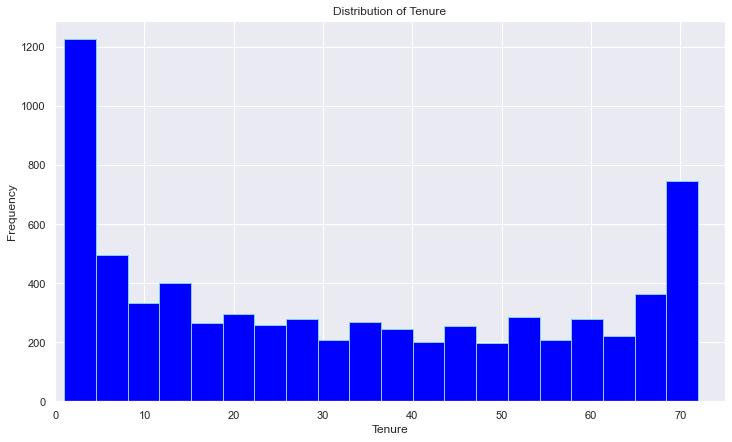

In [128]:
# Histogram plot for tenure

plt.figure(figsize=(12, 7))
plt.hist(df['tenure'], bins=20, color='blue', edgecolor='skyblue')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.xlim(0, 75)
plt.show()

(15.0, 120.0)

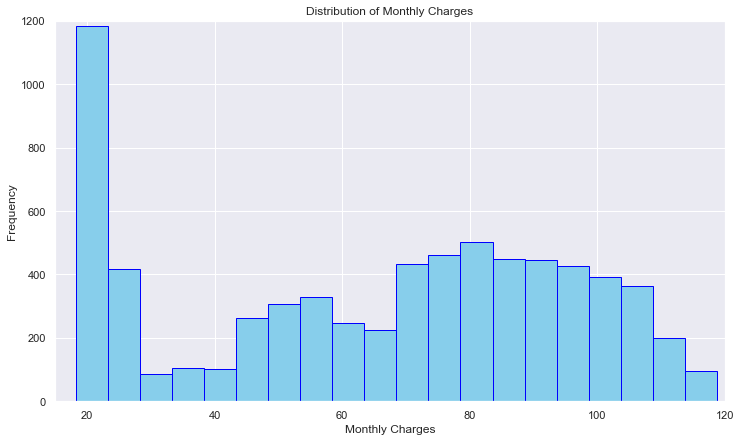

In [129]:
# Histogram for Monthly Charges

plt.figure(figsize=(12, 7))
df.MonthlyCharges.plot(kind="hist", bins=20, color='skyblue', edgecolor='blue')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.ylim(0, 1200)
plt.xlim(15, 120)

In [130]:
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors="coerce")

Text(0.5, 1.0, 'Distribution of Total Charges')

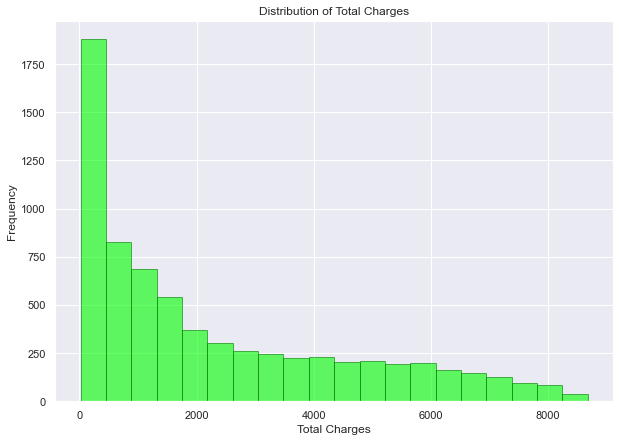

In [131]:
# Histogram plot for Total Charges

plt.figure(figsize=(10, 7))
df.TotalCharges.plot(kind="hist", bins=20, color='lime', edgecolor='green', alpha=0.6)
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges')

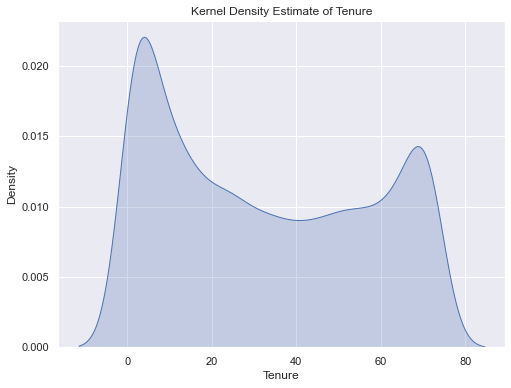

In [132]:
# Distribution of tenure
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='tenure', fill=True)
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Tenure')
plt.show()

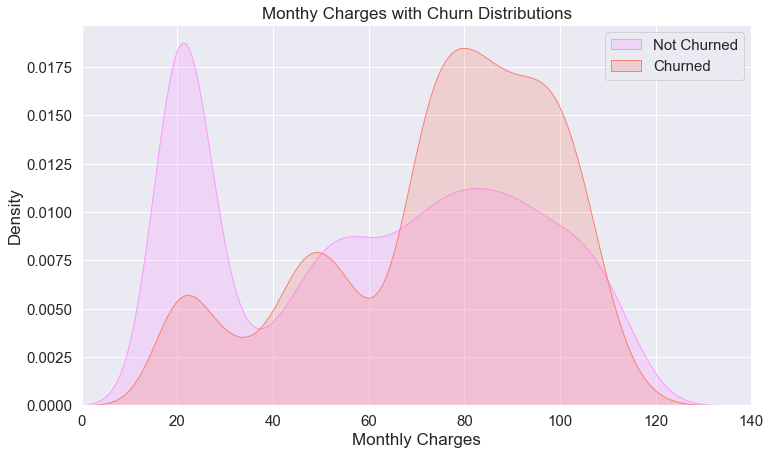

In [133]:
# Plot for monthly charges based on Churned or not Churned
plt.figure(figsize=(12, 7))

sns.kdeplot(data=df["MonthlyCharges"][df["Churn"] == "No"], color="#FF97FF", fill=True)
sns.kdeplot(data=df["MonthlyCharges"][df["Churn"] == "Yes"], color="salmon", fill=True)

plt.title("Monthy Charges with Churn Distributions", fontsize=17)
plt.xlabel("Monthly Charges", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 140)
plt.legend(["Not Churned", "Churned"], fontsize=15);

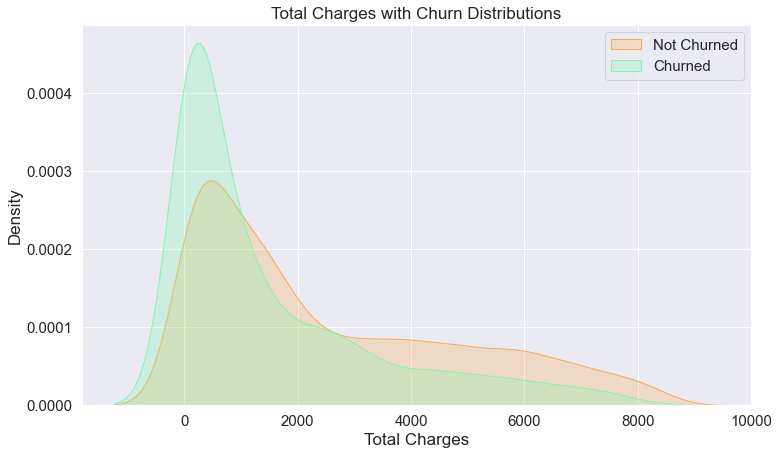

In [134]:
# Plot for Total charges
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.kdeplot(data=df["TotalCharges"][df["Churn"] == "No"], color="#fdaa48", fill=True)
ax = sns.kdeplot(data=df["TotalCharges"][df["Churn"] == "Yes"], color="#7af9ab", fill=True)

plt.title("Total Charges with Churn Distributions", fontsize=17)
plt.xlabel("Total Charges", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(right=10000)

plt.legend(["Not Churned", "Churned"], fontsize=15);

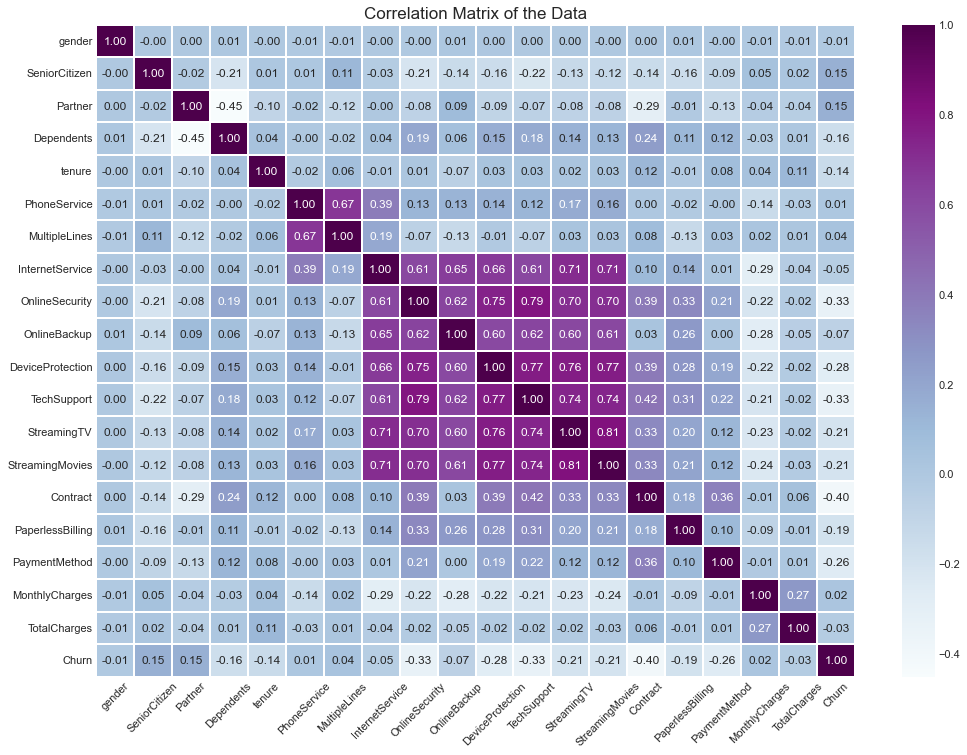

In [170]:
# Correlation matrix
correlation_matrix = df.apply(lambda x: pd.factorize(x)[0]).corr()
fig, ax = plt.subplots(figsize=(17, 12))

ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 fmt='.2f',
                 cmap="BuPu",
                 linewidths=.2)

plt.xticks(rotation=45);
plt.title("Correlation Matrix of the Data", fontsize=17);

In [138]:
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,No,No,No,No,No
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

## Preprocessing the data

Encoding the columns 

In [148]:
def label_encoder(column):
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

In [149]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        label_encoder(label)
        print(df[label].unique())

[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0 2]
[0 1 2]
[0 2 1]
[2 0 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 1 2]
[1 0]
[2 3 0 1]
[0 1]


In [150]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int32  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  
 17  

In [152]:
# As our columns `tenure`, `MonthlyCharges`, `TotalCharges` are distributed in different range of values
# Standardize the columns
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

df[columns] = scaler.fit_transform(df[columns])


In [153]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [154]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457


In [155]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [156]:
# Split the data into train and test sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 19), (1407, 19), (5625,), (1407,))

In [157]:
# Dictionary of models
models = {"Logistic_Regression": LogisticRegression(),
          "GaussianNB": GaussianNB(),
          "SVC": SVC(),
          "Decision_Tree_Classification": DecisionTreeClassifier(),
          "Random_Forest_Classification": RandomForestClassifier()}

# Building a function to fit and score the models
def fit_and_score(models, X_train, y_train, X_test, y_test):
    """
    A function which fit the models on train data and evaluate the models on the test data
    """
    np.random.seed(42)
    
    # DataFrame for models score
    models_scores = list()
    y_preds = {}
    for name, model in models.items():
        print(name)
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the model
        score = model.score(X_test, y_test)
        # Getting y_preds
        y_preds[name] = model.predict(X_test)
        models_scores.append({"Model": name, "Score": score})
    
    return pd.DataFrame(models_scores), y_preds

In [158]:
models_scores, y_preds_list = fit_and_score(models=models,
              X_train=X_train, 
              y_train=y_train,
              X_test=X_test,
              y_test=y_test)

Logistic_Regression
GaussianNB
SVC
Decision_Tree_Classification
Random_Forest_Classification


In [159]:
models_scores

,Model,Score
0,Logistic_Regression,0.786070
1,GaussianNB,0.737740
2,SVC,0.794598
3,Decision_Tree_Classification,0.724236
4,Random_Forest_Classification,0.789623


In [160]:
y_preds_list

{'Logistic_Regression': array([0, 0, 1, ..., 0, 0, 0]),
 'GaussianNB': array([0, 0, 1, ..., 0, 0, 0]),
 'SVC': array([0, 0, 1, ..., 0, 0, 0]),
 'Decision_Tree_Classification': array([0, 0, 1, ..., 0, 0, 0]),
 'Random_Forest_Classification': array([0, 0, 1, ..., 0, 0, 0])}

**Model Comparision**

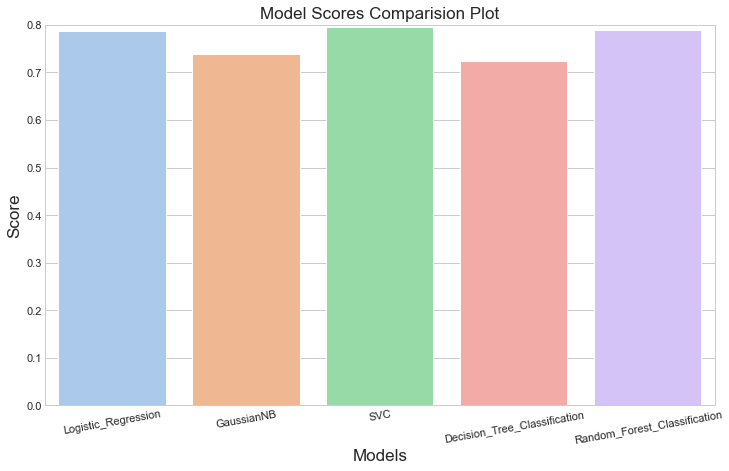

In [168]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.style.use("seaborn-v0_8-whitegrid")
sns.barplot(data=models_scores, x='Model', y='Score', palette='pastel')

plt.title("Model Scores Comparision Plot", fontsize=17)
plt.xlabel("Models", fontsize=17)
plt.ylabel("Score", fontsize=17)
plt.ylim(top=0.8)
plt.xticks(rotation=10);

## Evaluating our models 

Creating a function for cross_val_score which scores on Accuracy, Precision, Recall, F1-score on a model

In [50]:
def cross_validation(clf, X, y):
    """
    This function cross_val_scores on Accuracy, Precision, Recall, F1-score on the classifier.
    Returns a dictionary of each metrics with their maximum score
    """
    
    acc_score = cross_val_score(clf, X, y, scoring="accuracy")
    
    precision_score = cross_val_score(clf, X, y, scoring="precision")
    
    recall_score = cross_val_score(clf, X, y, scoring="recall")
    
    f1_score = cross_val_score(clf, X, y, scoring="f1")
    
    columns = ['Accuracy', 'Precision', 'Recall', 'F1']
    cross_model_score = {"Accuracy": acc_score.max(),
                         "Precision": precision_score.max(),
                         "Recall": recall_score.max(),
                         "F1": f1_score.max()}
    return cross_model_score

In [52]:
# Cross validating on all models
for name, model in models.items():
    scores = cross_validation(model, X, y)
    print(f"{name}\n{scores}\n")

Logistic_Regression
{'Accuracy': 0.8095238095238095, 'Precision': 0.6677215189873418, 'Recall': 0.5641711229946524, 'F1': 0.6115942028985507}

GaussianNB
{'Accuracy': 0.7617354196301565, 'Precision': 0.5372848948374761, 'Recall': 0.7513368983957219, 'F1': 0.6265328874024526}

SVC
{'Accuracy': 0.8073916133617626, 'Precision': 0.6926070038910506, 'Recall': 0.5, 'F1': 0.57984496124031}

Decision_Tree_Classification
{'Accuracy': 0.7432432432432432, 'Precision': 0.5217391304347826, 'Recall': 0.5106951871657754, 'F1': 0.526867627785059}

Random_Forest_Classification
{'Accuracy': 0.8002842928216063, 'Precision': 0.6619217081850534, 'Recall': 0.5, 'F1': 0.5766871165644172}



In [53]:
# Define a function which plots the confusion matrix

def plot_confusion(clf_name, y_test, y_preds):
    """
    This function plots the confusion matrix for classifiers.
    """
    
    sns.set(font_scale=1.2)
    
    plt.subplots(figsize=(3, 3))
    sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt="d", linewidth=0.5, cmap='YlGnBu', cbar=False)
    plt.title(clf_name)
    plt.show();

0


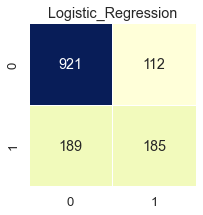

1


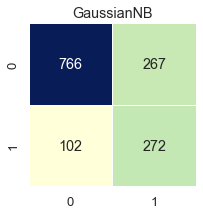

2


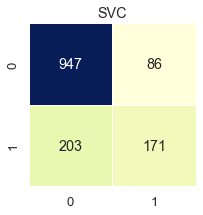

3


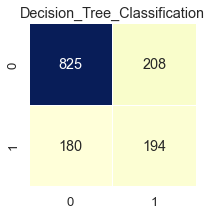

4


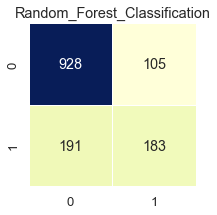

In [54]:
i = 0
for name, model in models.items():
    print(i)
    plot_confusion(clf_name=name, y_test=y_test, y_preds=y_preds_list[name])
    i += 1
    

### Classifcation Report

In [55]:
for name, model in models.items():
    print("\n",name)
    print(classification_report(y_test, y_preds_list[name]))


 Logistic_Regression
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407


 GaussianNB
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.50      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407


 SVC
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.67      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79

## Hyperparameter tuning with RandomizedSearchCV

So after seeing the cross validation report of the 5 models only 3 models touched 80% accuracy so will be doing RandomizedSearchCV on the these model:

    * LogisticRegression
    * SVC
    * RandomForestClassification

In [201]:
# Setting up hyperparameter grid for LogisticRegression()
lr_ = {"penalty": ['l2'],
                "C": np.logspace(-4, 4, 20),
                "solver": ['liblinear', 'lbfgs', 'saga'],
                "max_iter": np.arange(100, 1000, 50)}

# Setting up hyperparameter grid for SVC
svc_ = {"C": [0.01, 0.1, 1, 10, 100],
            "kernel": ['linear', 'sigmoid'],
            "gamma": ['scale', 'auto'],
            "degree": [1, 2, 3, 4, 5]}

# Setting up hyperparameter grid for RandomForest Classifier
rfc_ = {"n_estimators": np.arange(100, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": [2, 4, 6, 8],
            "min_samples_leaf": [1, 3,  5, 7],
            "max_features": ['sqrt', 'log2']}

In [202]:
# Fitting all the model on grid

logClf_r = RandomizedSearchCV(LogisticRegression(),
                             param_distributions=lr_,
                             cv=5,
                             n_jobs=-1)
logClf_r.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950]),
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'saga']})

In [57]:
rfClf_r = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rfc_,
                            cv=5,
                            n_jobs=-1)
rfClf_r.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])})

## Hyperparameter tuning using GridSearchCV

I have selected only 2 model because RandomForestClassification was taking too long to do the operation:
    
    * LogisticRegression
    * SVC

In [206]:
# Fitting the models on the grid

logClf_g = GridSearchCV(LogisticRegression(),
                       param_grid=lr_,
                       cv=5,
                       n_jobs=-1)
logClf_g.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950]),
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']})

In [161]:
svc_g = GridSearchCV(SVC(probability=True),
                    param_grid=svc_,
                    cv=5,
                    n_jobs=-1)
svc_g.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid']})

In [207]:
# Checking their scores
print("RandomizedSearhCV:\n")
print(f"LogisticRegression: {logClf_r.score(X_test, y_test)}\n")
print(f"SVC: {svc_r.score(X_test, y_test)}\n")
print(f"RandomForestClassification: {rfClf_r.score(X_test, y_test)}")

print("GridSearchCV:\n")
print(f"LogisticRegression: {logClf_g.score(X_test, y_test)}\n")
print(f"SVC: {svc_g.score(X_test, y_test)}\n")

RandomizedSearhCV:

LogisticRegression: 0.7853589196872779

SVC: 0.7938877043354655

RandomForestClassification: 0.7981520966595593
GridSearchCV:

LogisticRegression: 0.7853589196872779

SVC: 0.7931769722814499



### Evaluating our models

* ROC curve and AUc score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

First on the results of RandomizedSearchCV

In [169]:
def plot_roc_curve(y_true, y_pred, name=""):
    """
    Plots the roc_curve for the y_true and y_pred
    """
    # Get the fpr and tpr using roc_curve
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    
    # Calculate the auc-roc 
    auc_score = roc_auc_score(y_true, y_pred)

    # Plot the fpr against tpr
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label="{} (AUC={:.2f})".format(name, auc_score))
    plt.title("FPR vs. TPR of {}".format(name))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)
    plt.legend(loc="lower right", frameon=True)

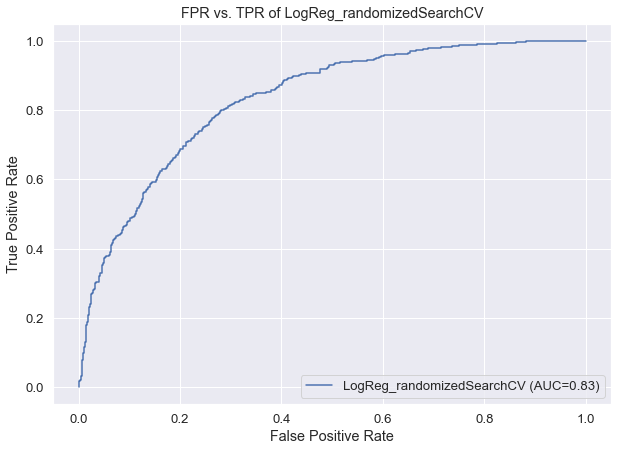

In [294]:
plot_roc_curve(y_test, logClf_r.predict_proba(X_test)[:, 1], "LogReg_randomizedSearchCV")

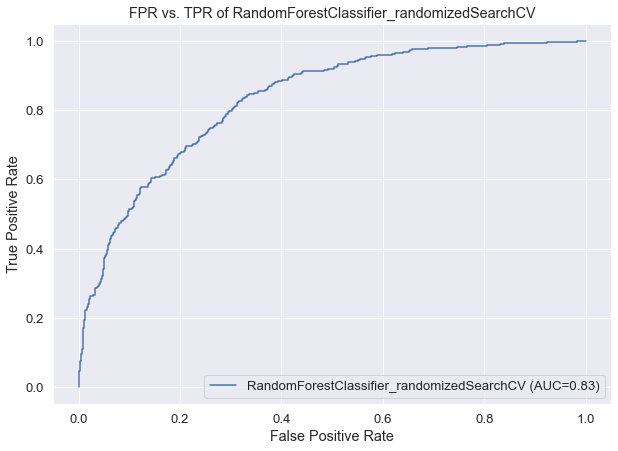

In [295]:
plot_roc_curve(y_test, rfClf_r.predict_proba(X_test)[:, 1], "RandomForestClassifier_randomizedSearchCV")

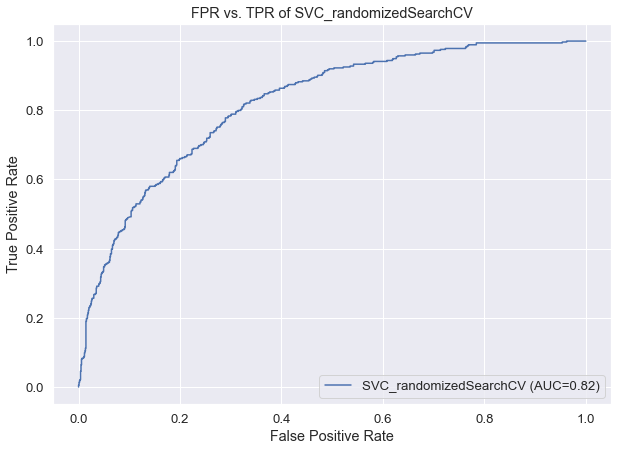

In [296]:
plot_roc_curve(y_test, svc_r.predict_proba(X_test)[:, 1], "SVC_randomizedSearchCV")

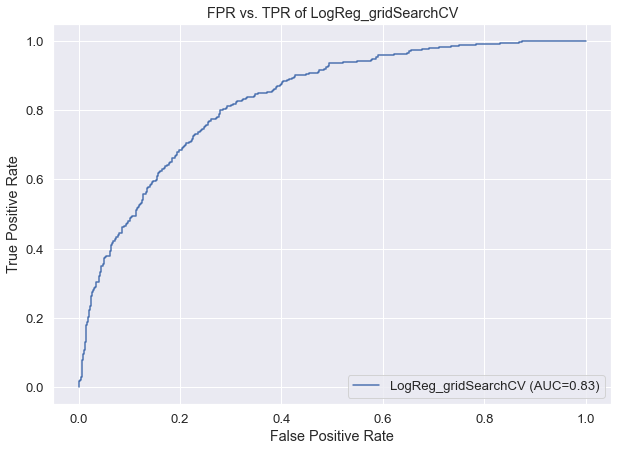

In [297]:
plot_roc_curve(y_test, logClf_g.predict_proba(X_test)[:, 1], "LogReg_gridSearchCV")

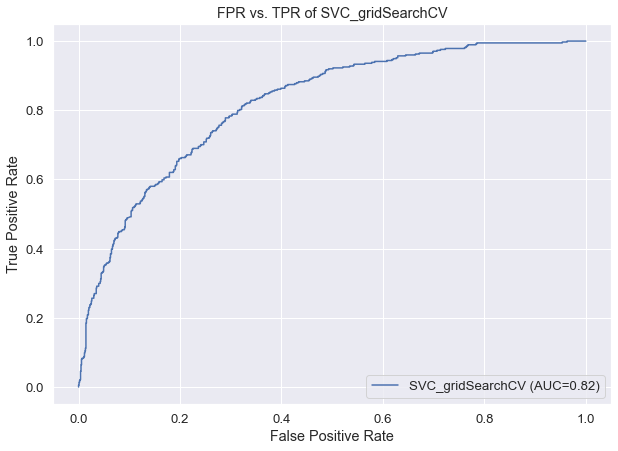

In [298]:
plot_roc_curve(y_test, svc_g.predict_proba(X_test)[:, 1], "SVC_gridSearchCV")

### Cross validating on the results of the RandomizedSearchCV and GridSearchCV

**RandomizedSearchCV**

In [204]:
logClf_r.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 400,
 'C': 1438.44988828766}

In [205]:
log_clf = LogisticRegression(solver= 'liblinear', penalty= 'l2', max_iter=400, C= 1438.44988828766)

In [174]:
svc_r.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'C': 10}

In [175]:
svc_clf = SVC(kernel="linear", gamma="scale", degree=2, C=10)

In [176]:
rfClf_r.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 10}

In [178]:
rf_clf = RandomForestClassifier(n_estimators= 200,
                                 min_samples_split= 4,
                                 min_samples_leaf= 5,
                                 max_features= 'log2',
                                 max_depth= 10)

In [213]:
# Create a list of model 
randomizedsearchcv = [log_clf, svc_clf, rf_clf]

randomizedsearch_result = []

for clf in randomizedsearchcv:
    randomizedsearch_result.append(cross_validation(clf, X, y))

randomizedsearch_result

[{'Accuracy': 0.8095238095238095,
  'Precision': 0.6677215189873418,
  'Recall': 0.5641711229946524,
  'F1': 0.6115942028985507},
 {'Accuracy': 0.8123667377398721,
  'Precision': 0.6729559748427673,
  'Recall': 0.5721925133689839,
  'F1': 0.6184971098265896},
 {'Accuracy': 0.810099573257468,
  'Precision': 0.6914498141263941,
  'Recall': 0.5133689839572193,
  'F1': 0.5767441860465117}]

**GridSearchCV**

In [209]:
logClf_g.best_params_

{'C': 0.615848211066026,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [210]:
log_clf_grid = LogisticRegression(C= 0.615848211066026, max_iter= 100, penalty= 'l2', solver= 'liblinear')

In [184]:
svc_g.best_params_

{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [185]:
svc_clf_grid = SVC(C= 1, degree= 1, gamma= 'scale', kernel= 'linear')

In [211]:
# Create a list of model
gridsearchcv = [log_clf_grid, svc_clf_grid]

grid_result = []

for clf in gridsearchcv:
    grid_result.append(cross_validation(clf, X, y))

In [212]:
grid_result

[{'Accuracy': 0.8116560056858564,
  'Precision': 0.6719242902208202,
  'Recall': 0.56951871657754,
  'F1': 0.6164978292329956},
 {'Accuracy': 0.8123667377398721,
  'Precision': 0.6729559748427673,
  'Recall': 0.5721925133689839,
  'F1': 0.6184971098265896}]

In [222]:
randomizedsearch_result_df = pd.DataFrame(randomizedsearch_result, index=["LogisticRegression", "SVC", "RandomForestClassifier"])
randomizedsearch_result_df

,Accuracy,Precision,Recall,F1
LogisticRegression,0.809524,0.667722,0.564171,0.611594
SVC,0.812367,0.672956,0.572193,0.618497
RandomForestClassifier,0.810100,0.691450,0.513369,0.576744


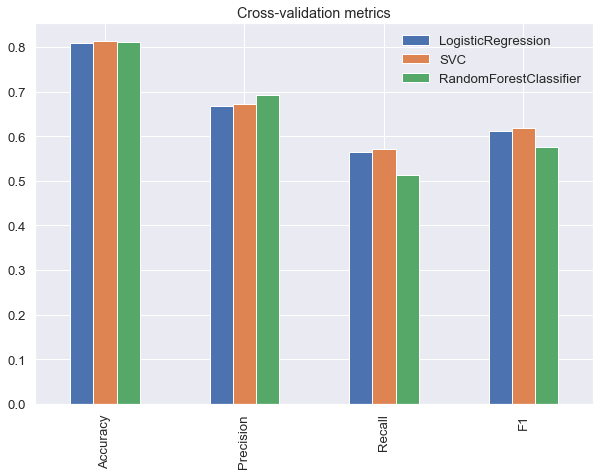

In [261]:
randomizedsearch_result_df.T.plot.bar(title="Cross-validation metrics", legend=True, figsize=(10, 7));

In [262]:
gridsearchcv_result_df = pd.DataFrame(grid_result, index=["LogisticRegression", "SVC"])
gridsearchcv_result_df

,Accuracy,Precision,Recall,F1
LogisticRegression,0.811656,0.671924,0.569519,0.616498
SVC,0.812367,0.672956,0.572193,0.618497


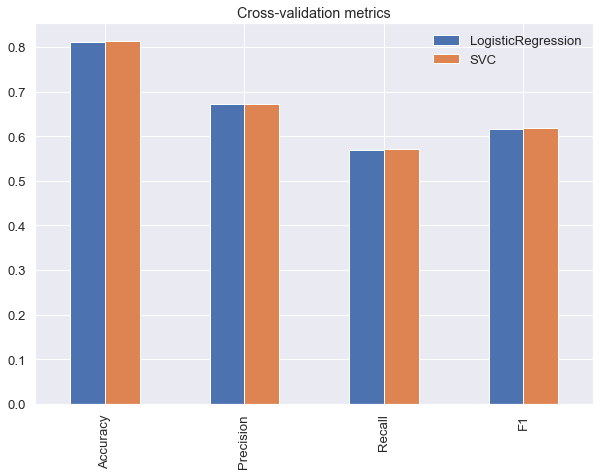

In [264]:
gridsearchcv_result_df.T.plot.bar(title="Cross-validation metrics", legend=True, figsize=(10, 7));

## Feature Importance

**RandomizedSearchCV model**

In [269]:
log_clf.fit(X_train, y_train)

LogisticRegression(C=1438.44988828766, max_iter=400, solver='saga')

In [278]:
svc_clf.fit(X_train, y_train)

SVC(C=10, degree=2, kernel='linear')

In [273]:
log_clf_feature_dict = dict(zip(df.columns, log_clf.coef_[0]))
log_clf_feature_dict

{'gender': -0.03749584714411251,
 'SeniorCitizen': 0.2809577590736561,
 'Partner': 0.06698283937848813,
 'Dependents': -0.23537920662920608,
 'tenure': -1.4859065837134247,
 'PhoneService': -1.0468243511649655,
 'MultipleLines': 0.059123755354976125,
 'InternetService': 0.2558779731412923,
 'OnlineSecurity': -0.29319027951859966,
 'OnlineBackup': -0.12102643453749493,
 'DeviceProtection': -0.07226793951506275,
 'TechSupport': -0.28232706721985795,
 'StreamingTV': 0.011959428533873016,
 'StreamingMovies': 0.01662675246015871,
 'Contract': -0.7359472458005715,
 'PaperlessBilling': 0.3007486493994646,
 'PaymentMethod': 0.04116205224954421,
 'MonthlyCharges': 0.6938424261255955,
 'TotalCharges': 0.7219053337461367}

In [281]:
svc_feature_dict = dict(zip(df.columns, svc_clf.coef_[0]))
svc_feature_dict

{'gender': -0.03143993160347236,
 'SeniorCitizen': 0.2571543339488471,
 'Partner': 0.07378618302209361,
 'Dependents': -0.1459142872472512,
 'tenure': -0.46187997566812555,
 'PhoneService': -0.9589708849334784,
 'MultipleLines': 0.03190172823269677,
 'InternetService': 0.5630151507384653,
 'OnlineSecurity': -0.23437551001370593,
 'OnlineBackup': -0.10995766003816243,
 'DeviceProtection': -0.08548030003839813,
 'TechSupport': -0.22479284582004766,
 'StreamingTV': -0.01792083769578312,
 'StreamingMovies': -0.018392064033832867,
 'Contract': -0.19458332748490648,
 'PaperlessBilling': 0.19407321602739103,
 'PaymentMethod': 0.03574235057021724,
 'MonthlyCharges': 0.8849189260972707,
 'TotalCharges': -0.3969184840168509}

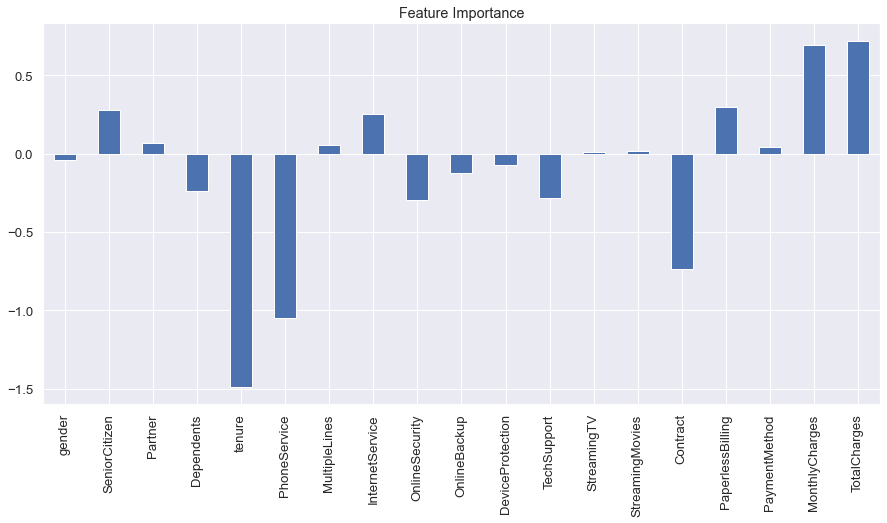

In [277]:
log_clf_feature_df = pd.DataFrame(log_clf_feature_dict, index=[0])
log_clf_feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(15, 7));

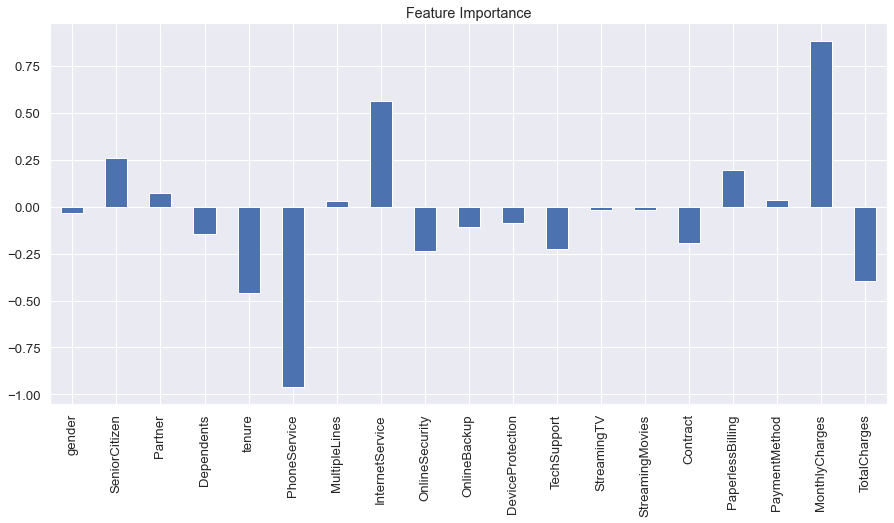

In [283]:
svc_clf_feature_df = pd.DataFrame(svc_feature_dict, index=[0])
svc_clf_feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(15, 7));

**GridSearchCV**

In [284]:
log_clf_grid.fit(X_train, y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [286]:
svc_clf_grid.fit(X_train, y_train)

SVC(C=1, degree=1, kernel='linear')

In [287]:
log_clf_grid_feature_dict = dict(zip(df.columns, log_clf_grid.coef_[0]))
log_clf_grid_feature_dict

{'gender': -0.03845052382213263,
 'SeniorCitizen': 0.27931275169775094,
 'Partner': 0.06193333509890437,
 'Dependents': -0.23606843233943883,
 'tenure': -1.392707328841592,
 'PhoneService': -0.9963478860973187,
 'MultipleLines': 0.06199166819881175,
 'InternetService': 0.247145156762591,
 'OnlineSecurity': -0.29398490301436203,
 'OnlineBackup': -0.11979395674259823,
 'DeviceProtection': -0.07124206338457383,
 'TechSupport': -0.28197167056093253,
 'StreamingTV': 0.014913923244838697,
 'StreamingMovies': 0.019776223243953475,
 'Contract': -0.7323291213972067,
 'PaperlessBilling': 0.2968944384701579,
 'PaymentMethod': 0.04235594469110307,
 'MonthlyCharges': 0.6994917632296251,
 'TotalCharges': 0.6287242783760021}

In [288]:
svc_clf_grid_feature_dict = dict(zip(df.columns, svc_clf_grid.coef_[0]))
svc_clf_grid_feature_dict

{'gender': -0.03062667859433077,
 'SeniorCitizen': 0.25672032987193916,
 'Partner': 0.07210827396983177,
 'Dependents': -0.14734297206118185,
 'tenure': -0.4635615426127515,
 'PhoneService': -0.9523324974520619,
 'MultipleLines': 0.03300800385147795,
 'InternetService': 0.5613355054380236,
 'OnlineSecurity': -0.23111376961423957,
 'OnlineBackup': -0.109576767014687,
 'DeviceProtection': -0.08597710447872942,
 'TechSupport': -0.22398860954808697,
 'StreamingTV': -0.018147358420605997,
 'StreamingMovies': -0.017912547894184172,
 'Contract': -0.19260030974800202,
 'PaperlessBilling': 0.19475626344694774,
 'PaymentMethod': 0.03570469595479153,
 'MonthlyCharges': 0.8848156966665641,
 'TotalCharges': -0.39554550623242335}

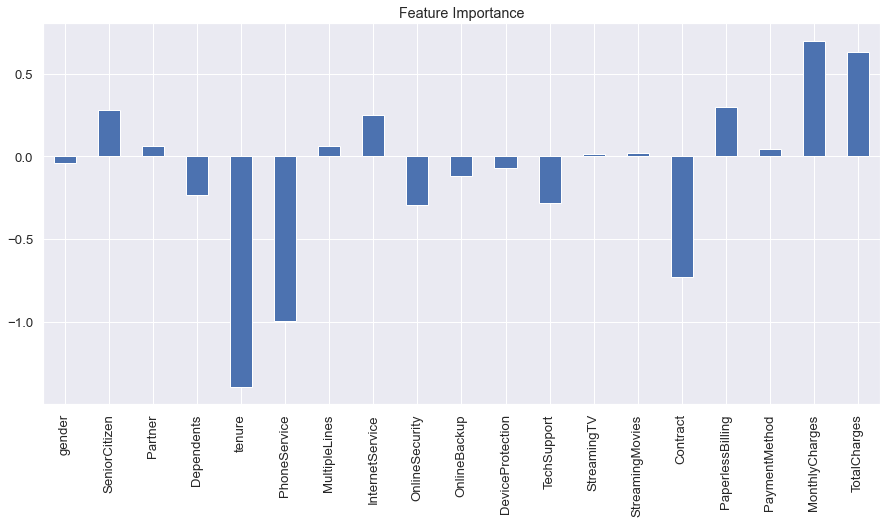

In [289]:
log_clf_grid_feature_df = pd.DataFrame(log_clf_grid_feature_dict, index=[0])
log_clf_grid_feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(15, 7));

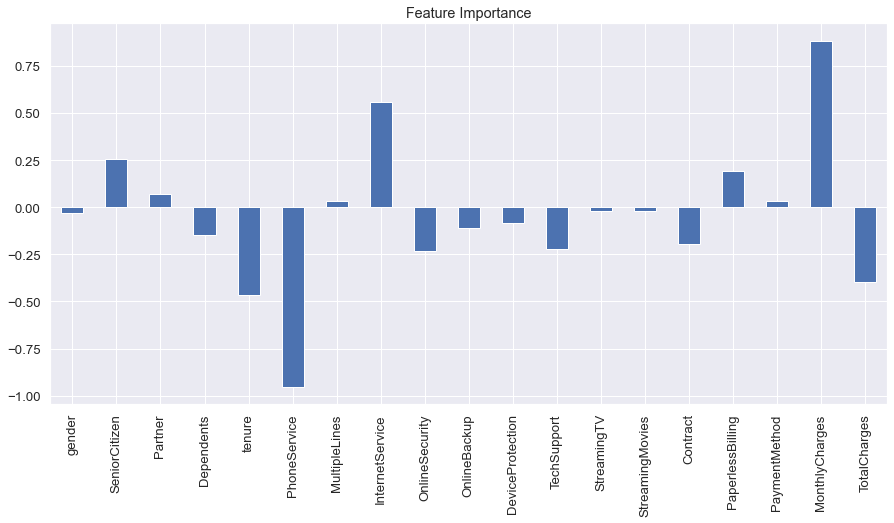

In [290]:
svc_clf_grid_feature_df = pd.DataFrame(svc_clf_grid_feature_dict, index=[0])
svc_clf_grid_feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(15, 7));